In [449]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
df=pd.read_excel('/content/drive/MyDrive/aqi/air_quality.xlsx',header=1)

In [450]:
df.head()

,Sr No.,Name of Station,Date,NO,NO2,NOx,NH3,SO2,CO,O3,PM2.5,PM10,Air Quality,AQI
0,1,Ambala,01.01.2020,55.04,87.10,89.64,33.72,18.04,1.39,34.60,113.33,215.96,Poor,269
1,2,Bahadurgarh,01.01.2020,55.13,98.94,92.99,54.68,17.04,2.51,22.08,162.97,222.29,Very Poor,334
2,3,Ballabgarh,01.01.2020,39.19,99.80,90.53,58.27,3.32,3.35,4.77,242.98,402.69,Very Poor,397
3,4,Bhiwani,01.01.2020,4.42,36.47,22.27,12.09,24.38,1.26,69.59,161.53,199.28,Very Poor,349
4,5,Dharuhera,01.01.2020,83.68,73.10,105.29,46.34,19.64,3.27,21.13,107.29,390.84,Very Poor,329


In [451]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#DATA PREPROCESSING

In [452]:
df['Date']=pd.to_datetime(df['Date'])

In [453]:

df.drop('Sr No.',axis=1,inplace=True)

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name of Station  2162 non-null   object        
 1   Date             2162 non-null   datetime64[ns]
 2   NO               2162 non-null   float64       
 3   NO2              2162 non-null   float64       
 4   NOx              2162 non-null   float64       
 5   NH3              2162 non-null   float64       
 6   SO2              2162 non-null   float64       
 7   CO               2162 non-null   float64       
 8   O3               2162 non-null   float64       
 9   PM2.5            2162 non-null   float64       
 10  PM10             2162 non-null   float64       
 11  Air Quality      2162 non-null   object        
 12  AQI              2162 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 219.7+ KB


In [455]:
df.dropna()

,Name of Station,Date,NO,NO2,NOx,NH3,SO2,CO,O3,PM2.5,PM10,Air Quality,AQI
0,Ambala,2020-01-01,55.04,87.10,89.64,33.72,18.04,1.39,34.60,113.33,215.96,Poor,269
1,Bahadurgarh,2020-01-01,55.13,98.94,92.99,54.68,17.04,2.51,22.08,162.97,222.29,Very Poor,334
2,Ballabgarh,2020-01-01,39.19,99.80,90.53,58.27,3.32,3.35,4.77,242.98,402.69,Very Poor,397
3,Bhiwani,2020-01-01,4.42,36.47,22.27,12.09,24.38,1.26,69.59,161.53,199.28,Very Poor,349
4,Dharuhera,2020-01-01,83.68,73.10,105.29,46.34,19.64,3.27,21.13,107.29,390.84,Very Poor,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,Panipat,2019-12-31,425.58,79.63,382.88,33.80,30.16,0.18,38.58,172.29,410.87,Very Poor,318
2158,Rohtak,2019-12-31,0.00,0.00,0.00,0.00,13.18,1.41,34.00,204.08,0.00,Very Poor,374
2159,Sirsa,2019-12-31,6.46,2.54,4.93,4.09,26.80,1.25,20.17,83.14,183.90,Moderate,136
2160,Sonipat,2019-12-31,34.06,16.63,3.37,25.31,26.01,2.70,6.97,68.48,342.57,Moderate,153


In [456]:
df.drop(['Name of Station','Date'],axis=1,inplace=True)

In [457]:
df.head()

,NO,NO2,NOx,NH3,SO2,CO,O3,PM2.5,PM10,Air Quality,AQI
0,55.04,87.10,89.64,33.72,18.04,1.39,34.60,113.33,215.96,Poor,269
1,55.13,98.94,92.99,54.68,17.04,2.51,22.08,162.97,222.29,Very Poor,334
2,39.19,99.80,90.53,58.27,3.32,3.35,4.77,242.98,402.69,Very Poor,397
3,4.42,36.47,22.27,12.09,24.38,1.26,69.59,161.53,199.28,Very Poor,349
4,83.68,73.10,105.29,46.34,19.64,3.27,21.13,107.29,390.84,Very Poor,329


In [458]:
df['Air Quality'].nunique()

11

In [459]:
df['Air Quality'].unique()

array(['Poor', 'Very Poor', 'Severe', 'Moderate', '#', 'Satisfactory',
       'Good', '$', 'Not-Obtained', 'poor', 'Satisfactory '], dtype=object)

In [460]:

((df['Air Quality']=="#") |(df['Air Quality']=="$") | (df['Air Quality']=="Not-Obtained")).sum()

121

In [461]:
#df.to_csv("/content/drive/MyDrive/aqi/air_quality_cleaned.xlsx",index=False)

#DATA VISUALISATION

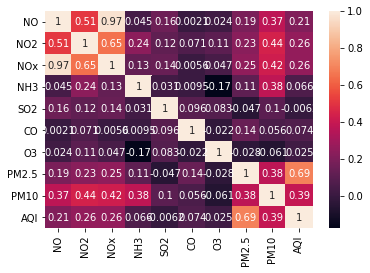

In [462]:
import seaborn as sns
x=df.corr()
sns.heatmap(x,annot=True)

 THE PM2.5 HAS THE HIGHEST CORRELATION 


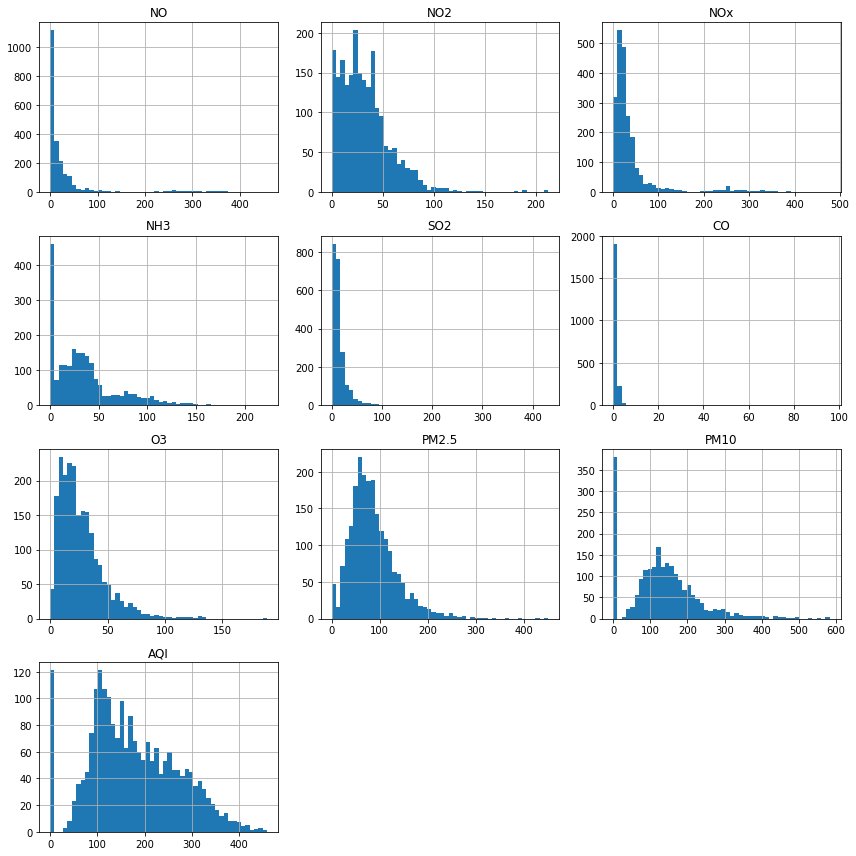

In [463]:
df.hist(figsize=(12,12),bins=50)
plt.tight_layout()

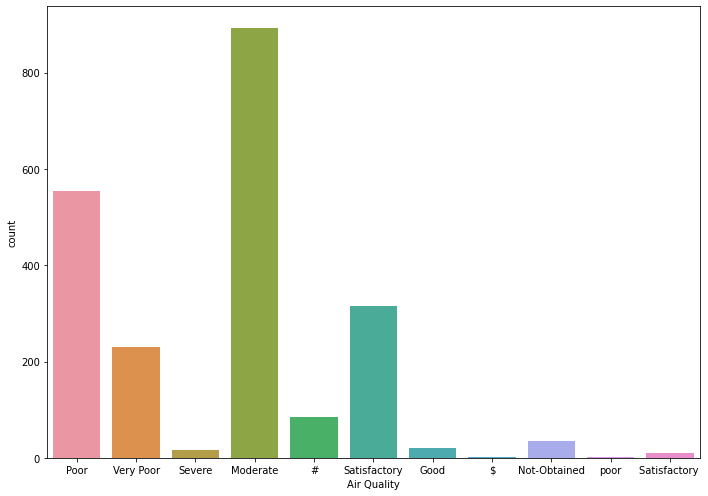

In [464]:
plt.figure(figsize=(10,7))
sns.countplot(x='Air Quality', data=df)
plt.tight_layout()

so we can see that the # , $ ,Not-obtanined,poor so we have o change the poor to Poor

In [465]:
for i in df['Air Quality']:
  df['Air Quality'].replace({'poor':'Poor','#':np.nan,"$":np.nan,"Not-Obtained":np.nan},inplace=True)

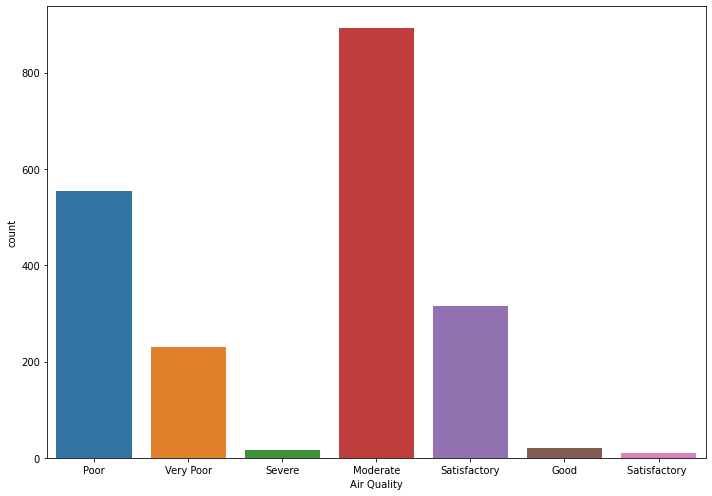

In [466]:
plt.figure(figsize=(10,7))
sns.countplot(x='Air Quality', data=df)
plt.tight_layout()

#Checking for outliers

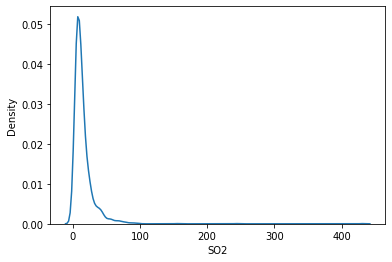

In [467]:
import seaborn as sns
sns.kdeplot(data=df, x="SO2")

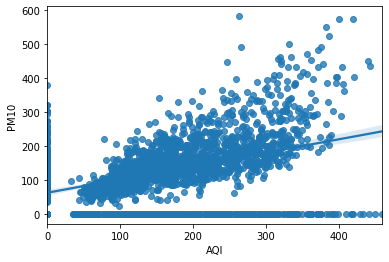

In [468]:
sns.regplot(x="AQI", y="PM10", data=df)

so you can see that the pm10 value is directly proportion with the AQI.

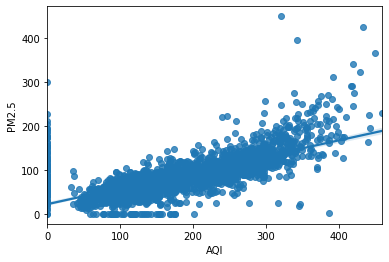

In [469]:
sns.regplot(x="AQI", y="PM2.5", data=df)

same goes for the pm2.5 value is directly proportion with the AQI

In [470]:
df['Air Quality'].unique()

array(['Poor', 'Very Poor', 'Severe', 'Moderate', nan, 'Satisfactory',
       'Good', 'Satisfactory '], dtype=object)

In [471]:
df.isnull().sum()

NO               0
NO2              0
NOx              0
NH3              0
SO2              0
CO               0
O3               0
PM2.5            0
PM10             0
Air Quality    121
AQI              0
dtype: int64

In [472]:
df.describe()

,NO,NO2,NOx,NH3,SO2,CO,O3,PM2.5,PM10,AQI
count,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000
mean,28.724135,32.459949,39.205689,34.809852,14.990000,1.173765,27.073834,85.816323,131.483636,175.435708
std,61.701926,24.400840,57.623721,33.806780,16.817531,2.323499,19.815171,49.291872,94.147587,93.467387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.200000,14.142500,13.572500,9.082500,6.485000,0.612500,12.715000,53.562500,76.662500,108.000000
50%,8.670000,28.420000,22.450000,27.605000,10.765000,0.900000,22.020000,77.395000,126.615000,164.000000
75%,24.090000,44.347500,38.705000,45.475000,17.607500,1.340000,35.472500,109.630000,180.247500,244.000000
max,457.340000,211.860000,477.290000,222.710000,431.390000,95.830000,188.700000,449.800000,582.700000,459.000000


In [473]:
df.duplicated().sum()

1

In [474]:
df.drop_duplicates( keep='first', inplace=True)

In [475]:
x=df.drop(['AQI','Air Quality'],axis=1)
y=df['AQI']


In [476]:
x.head()

,NO,NO2,NOx,NH3,SO2,CO,O3,PM2.5,PM10
0,55.04,87.10,89.64,33.72,18.04,1.39,34.60,113.33,215.96
1,55.13,98.94,92.99,54.68,17.04,2.51,22.08,162.97,222.29
2,39.19,99.80,90.53,58.27,3.32,3.35,4.77,242.98,402.69
3,4.42,36.47,22.27,12.09,24.38,1.26,69.59,161.53,199.28
4,83.68,73.10,105.29,46.34,19.64,3.27,21.13,107.29,390.84


In [477]:
y.head()

0    269
1    334
2    397
3    349
4    329
Name: AQI, dtype: int64

In [478]:
x.shape

(2161, 9)

In [479]:
y.shape

(2161,)

#EXTRA TREE REGRESSOR

In [480]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [481]:
print(model.feature_importances_)

[0.0466547  0.04927925 0.04425363 0.04645271 0.04917274 0.06137673
 0.05259384 0.46976688 0.18044952]


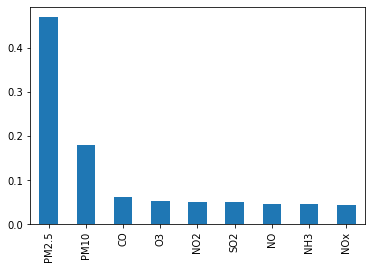

In [482]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


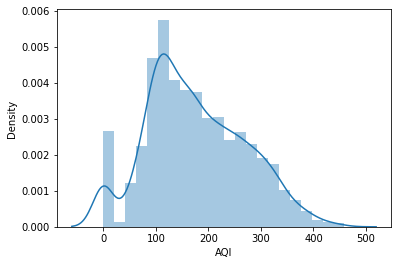

In [483]:
import seaborn as sns
sns.distplot(y)

this suggest that there might me some outlier as the y is not continous

<h2>Mean absolute error:</h2> This is the average of absolute errors of all the data points in the given dataset.<br>
<h2>Mean squared error:</h2> This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!<br>
<h2>Median absolute error:</h2> This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.<br>
<h2>Explained variance score:</h2> This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.<br>
<h2>R2 score:</h2> This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.<br>

#APPLYING LINEAR REGRESSION

In [484]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [485]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [486]:
lnr=LinearRegression()
lnr.fit(X_train,y_train)
y_pred=lnr.predict(X_test)

In [487]:
import sklearn.metrics as sm
acc_lnr = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_lnr)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5070778693836804
Adjusted R^2: 0.5001353041637322
MAE: 48.36314547023093
MSE: 4588.086232076022
RMSE: 67.73541342662656


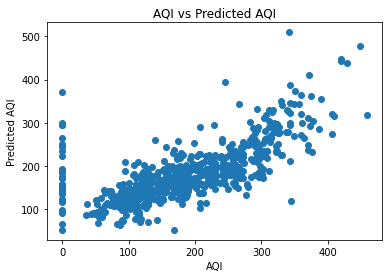

In [488]:
plt.scatter(y_test, y_pred)
plt.xlabel("AQI")
plt.ylabel("Predicted AQI")
plt.title("AQI vs Predicted AQI")
plt.show()

#APPLYING RANDOM FOREST

In [489]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=20)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [490]:
import sklearn.metrics as sm
acc_rf = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5069158677193526
Adjusted R^2: 0.49997102078582234
MAE: 46.22296224961479
MSE: 4589.594132735191
RMSE: 67.74654332683839


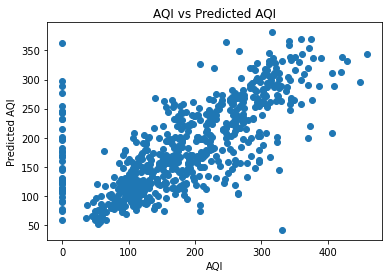

In [491]:
plt.scatter(y_test, y_pred)
plt.xlabel("AQI")
plt.ylabel("Predicted AQI")
plt.title("AQI vs Predicted AQI")
plt.show()

#APPLYING THE SVR MODEL

In [492]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [493]:
import sklearn.metrics as sm
acc_svm = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.4124863046280639
Adjusted R^2: 0.4042114638481774
MAE: 54.862961098155864
MSE: 5468.538191867585
RMSE: 73.94956519052417


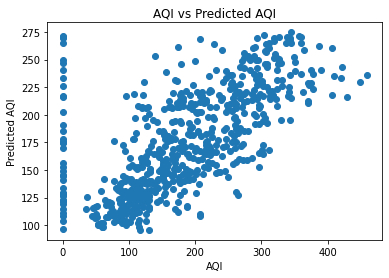

In [494]:
plt.scatter(y_test, y_pred)
plt.xlabel("AQI")
plt.ylabel("Predicted AQI")
plt.title("AQI vs Predicted AQI")
plt.show()

#LASSO regression

In [495]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [496]:
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 46.214 (3.756)


#XGBOOST REGRESSOR

In [497]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE 

In [498]:
xgb_r = xg.XGBRegressor() 
# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
y_pred = xgb_r.predict(X_test) 

[11:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [499]:
import sklearn.metrics as sm
acc_xg = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_xg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5198240651338447
Adjusted R^2: 0.5130610237977016
MAE: 45.58005936891529
MSE: 4469.445494319828
RMSE: 66.85391158578403


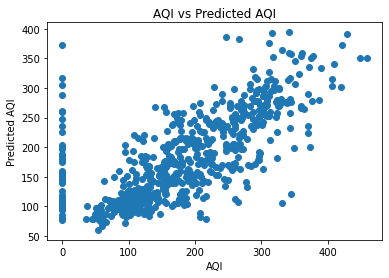

In [500]:
plt.scatter(y_test, y_pred)
plt.xlabel("AQI")
plt.ylabel("Predicted AQI")
plt.title("AQI vs Predicted AQI")
plt.show()

#KNN REGRESSOR

In [501]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test) 

In [502]:
acc_knn_r = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_knn_r)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.3824552236707248
Adjusted R^2: 0.37375740991960826
MAE: 53.21263482280431
MSE: 5748.065485362095
RMSE: 75.81599755567485


#APPLYING THE STANDARDISATION 

In [503]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
y = sc_y.fit_transform(np.array(y).reshape(-1,1))

In [504]:
X.shape

(2161, 9)

In [505]:
y.shape

(2161, 1)

In [506]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

#LINEAR REGRESSION

In [507]:
lnr=LinearRegression()
lnr.fit(X_train,y_train)
y_pred=lnr.predict(X_test)

In [508]:
import sklearn.metrics as sm
acc_lnr_s = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_lnr_s)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5070778693836805
Adjusted R^2: 0.5001353041637324
MAE: 0.5178558640085967
MSE: 0.5260418428950752
RMSE: 0.7252874208857307


#RANDOM FOREST

In [509]:
reg = RandomForestRegressor(n_estimators=20)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [510]:

acc_rf_s = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_rf_s)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5094451121888419
Adjusted R^2: 0.5025358884168538
MAE: 0.49619816735167266
MSE: 0.5235155437284092
RMSE: 0.7235437400243396


#SVM (REGRESSOR)

In [511]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [512]:
acc_svm_s = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_svm_s)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5476668090190093
Adjusted R^2: 0.5412959190051926
MAE: 0.45277864419763314
MSE: 0.48272570981695845
RMSE: 0.6947846499577826


#LASSO REGRESSOR

In [513]:
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.805 (0.037)


#XGBOOST

In [514]:
xgb_r = xg.XGBRegressor() 
# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
y_pred = xgb_r.predict(X_test) 

[11:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [515]:
acc_xg_s = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_xg_s)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5295366111964477
Adjusted R^2: 0.5229103662837216
MAE: 0.4832586209616666
MSE: 0.5020740857210952
RMSE: 0.7085718634839343


#KNN REGRESSOR

In [516]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test) 

In [517]:
acc_knn_r_s = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_knn_r_s)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.440588653759853
Adjusted R^2: 0.43270962071421715
MAE: 0.5417429851043221
MSE: 0.5969985059194645
RMSE: 0.7726567840376893


#chaos!!

#model comparision before applying standardisation

In [520]:
models = pd.DataFrame({
    'Model without standardisation': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines','KNN regressor'],
    'R-squared Score': [acc_lnr*100, acc_rf*100, acc_xg*100, acc_svm*100,acc_knn_r*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model without standardisation,R-squared Score
2,XGBoost,51.982407
0,Linear Regression,50.707787
1,Random Forest,50.691587
3,Support Vector Machines,41.248630
4,KNN regressor,38.245522


#Model comparision after standardisation

In [521]:
models = pd.DataFrame({
    'Model without standardisation': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines','KNN regressor'],
    'R-squared Score': [acc_lnr_s*100, acc_rf_s*100, acc_xg_s*100, acc_svm_s*100,acc_knn_r_s*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model without standardisation,R-squared Score
3,Support Vector Machines,54.766681
2,XGBoost,52.953661
1,Random Forest,50.944511
0,Linear Regression,50.707787
4,KNN regressor,44.058865


#Chaos END!!

#ARTIFICAL NEURAL NETWORK